# Finite-size corrections to charged defect supercells with FHI-aims

## 1. Introduction

This jupyter notebook workflow has been designed for applying finite-size correction schemes to charged defects when calculating the formation energy for a charged point defect with the supercell method and outputs from the all-electron electronic structure software package [FHI-aims](https://aimsclub.fhi-berlin.mpg.de/). This notebook provides a step-by-step explanation of the processing of the defect data when applying the correction schemes utilised in this workflow as the notebook progresses.

This notebook can be used to perform corrections for one defect at a time. However, if the user has a large set of defect calculations to process, another script has been made available called DefectCorrectionsDataset.py. This uses the [NotebookScripter](https://github.com/breathe/NotebookScripter) library to run this notebook over a set of defect calculations from the terminal. It is still advisable to first step through the workflow in this notebook to be aware of the steps and assumptions made during the processing of the data. The entire notebook can also be run by selecting 'Kernel --> Restart & Run All'. Outputs generated by this workflow are stored in a directory 'ProcessedDefects' in the same directory as this notebook.

### Background reading

For background reading on electronic structure calculations for defects in solids, doi: 10.1103/RevModPhys.86.253 provides a thorough review on the topic where it is the 'supercell approach' that is utilised in this workflow. Other important background reading includes doi: 10.1088/0965-0393/17/8/084002, doi: 10.1103/PhysRevLett.102.016402, doi: 10.1016/j.cpc.2018.01.011 and doi: 10.1103/PhysRevB.89.195205. Methods described in all of these works are relevant for this workflow.

### Calculating the formation energy of charged defect supercells
The formation energy of a charged defect is given by:

$ \Delta H_{D,q} = [E_{D,q} + E^{corr}_{q}] - E_{host} + \sum_i n_i (E_i + \mu_i) + q[\epsilon_F + \epsilon_{\nu} + \Delta \nu_{0/b}] $

Where $E_{D,q}$ is the total energy for a defect in charge state q embedded in a supercell from electronic structure calculations, $E^{corr}_{q}$ are finite-size corrections to this defect supercell, $E_{host}$ is the calculated total energy of an equivalent perfect host lattice supercell, $n_i$ is the number of atoms of species i added to ($n_i > 0 $) or removed from ($n_i < 0$) the chemical reservoir when the defect is formed. $\mu_i$ is the chemical potential of species i, referenced to the total energy of the pure element in its standard state, $E_i$, $\epsilon_F$ is the position of the Fermi level in the band gap,  $q \epsilon_{\nu}$ (energy of bulk VBM) and $\Delta \nu_{0/b}$ (term used to align the electrostatic potential of the VBM for the bulk and defect supercells). Please refer to papers listed in the 'background reading' section for more details.

### Finite-size corrections schemes
In this workflow, it is possible to obtain the $E^{corr}_{q}$ term for a charged defect in periodic DFT calculations with dielectric screening from the host lattice with either the LZ (doi: 10.1088/0965-0393/17/8/084002) or FNV (doi: 10.1103/PhysRevLett.102.016402) finite-size correction schemes. The FNV scheme is implemented here by using the [CoFFEE](https://doi.org/10.1016/j.cpc.2018.01.011) python code (doi: 10.1016/j.cpc.2018.01.011) and in this workflow functions from [pylada-defects](https://github.com/pylada/pylada-defects) (doi: 10.1016/j.commatsci.2016.12.040) are utilised to obtain the $E^{corr}_{q}$ term within the LZ scheme. The option to implement either or both of these schemes to obtain values for $E^{corr}_{q}$ is determined in the **user inputs cell by setting 'LZ' or 'FNV' to 'True'**. Note that the FNV scheme involves an alignment-like step and this can be performed using either the planar average of the electrostatic potential or averaged atom-site potentials with the sampling region proposed by Kumagai and Oba (doi: 10.1103/PhysRevB.89.195205), see Fig. 2(a) in the publication. The option to implement either or both of these methods is determined in the user inputs cell by setting **'atom_centered_pa' or 'planar_av_pa' to 'True'**.

Currently, band filling corrections to $E^{corr}_{q}$ (descriptions of which can be found in in doi: 10.1103/physrevb.72.035211, 10.1103/PhysRevB.78.235104 and 10.1088/0965-0393/17/8/084002) that are most relevant for shallow defects with delocalised defect-induced charge, are not currently available in this workflow (but would make for a nice addition!).

The potential alignment step (towards the end of the workflow) to obtain $\Delta \nu_{0/b}$ can also use either planar averages of the electrostatic potential or averaged atom-site potentials with the sampling region proposed by Kumagai and Oba. The option to implement either or both of these methods is determined in the user inputs cell, also by setting **'atom_centered_pa' or 'planar_av_pa' to 'True'**.

**Note:** For potential alignment, it can be difficult to generate clear plots with planar averages of potentials if the defect supercells have been relaxed. Using averaged atom-site potentials by setting 'atom_centered_pa' to 'True' is usually more robust for this.

## 2. Assumptions

### Necessary data

1. Components of the static dielectric tensor of the host crystal (calculated electronic + ionic contributions). This must be added to the user inputs cell. It is best to use computed values for dielectric constants for consistent corrections.

2. Relaxed structures for charged defect supercells, neutral defect supercells and equivalent perfect supercell. (Supercells have all been relaxed and then a single one-shot is performed where control.in tags for geometry relaxation have been removed or commented out and the tag for atom site potentials and the planar average has been included `output on-site esp` and `output realspace_esp 100 100 100`).

### Defect supercells

1. The **VOLUME** of the supercells has **NOT** been relaxed so lattice vectors are the same for the perfect and defect supercells (this is appropriate for simulating defects in the dilute limit).

2. DFT data being processed is for **INTRINSIC** defects only (there are no atom types present in the defect supercell that are not also present in the perfect supercell)... but modifying the workflow to allow for extrinsic defects would be a nice extension!

3. A maximum of one point defect is present in each supercell.

4. When vacancies are created in the supercell, the line for the vacancy site has been removed (not just commented out).

5. The supercells have orthogonal axes for the lattice vectors (a small amount of numerical noise in the off-diagonals is okay).

6. Geometry files can be either in fractional or Cartesian coordinates as they are automatically all converted into Cartesian coordinates in the workflow.

The above assumptions are necessary for the methods used to locate the defects in this workflow using functions in DefectSupercellAnalyses.py.


### Format of data

1. All output filenames from FHI-aims calculations still have their original default names: 'geometry.in', 'On-site_ESP.dat' and 'plane_average_realspace_ESP.out'.

2. The data from all final one-shot calculations of the perfect and defect supercells are stored in one directory. Sub-directories for the different defects within this directory are fine (will be searched through by this notebook) and are to be expected to keep data organised!

3. As no relaxation steps were performed on the final structures, the only geometry files in these directories should be 'geometry.in' files (i.e. no 'geometry.in.next_step' files) and these correspond to the final relaxed structure for each supercell.


### Image charge correction for the LZ scheme
The calculation of $E^{corr, LZ}_q$ in this workflow makes the approximation of isotropic dielectric screening from the host lattice (from the use of the isotropic average of the static dielectric constant). Extending this workflow to allow for anisotropic dielectric screening with all components of the static dielectric tensor of the host lattice is another good option for future development.

### Charge model for the FNV scheme

See CoFFEE paper (doi: 10.1016/j.cpc.2018.01.011) and later cells in this notebook for more details on the role of the Gaussian charge model used in this correction scheme. Assumptions made in this workflow:

1. The same sigma value is used for the Gaussian charge model implemented in the CoFFEE package for all defects in the same set for consistency. The maximum sigma is assumed to be the minimum distance of all defects in the set to the supercell boundary, but note that in reality the charge associated with some defects may be more or less disperse than others.

2. This workflow sets the cutoff for the plane waves used in CoFFEE's Poisson solver. Smaller sigma values require more plane waves to achieve convergence and the more plane waves the slower the solver will be. If it turns out that you are unable to achieve convergence with the cutoff value set in the notebook based on sigma, there is also the option to override the value and set this manually. This is the 'manual_cutoff' variable in the user inputs cell. Tests so far have not shown this to be necessary.
3. This workflow does not currently include band filling corrections. It is assumed that the charge associated with a defect is contained within the supercell.

## 3. Getting setup for the workflow
First download a copy of the repository. All analysis should be performed from the directory containing this notebook file (DefectCorrectionsNotebook.ipynb).

This workflow uses python3. The most convenient way to setup the python environment for this workflow is to use [Anaconda](https://www.anaconda.com/distribution/).

Before running this notebook, make sure you have your conda environment set up as described below.

### Option 1: Create your conda env directly from the .yml file
All dependencies present when testing this workflow are listed in DefectCorrections_conda_env.yml. This environment can be re-created using conda with 

`conda env create -n chooseYourEnvName --file DefectCorrectionsCondaEnv.yml` 

To use this workflow you must then activate this conda environment with 

`conda activate YourChosenEnvName`

### Option 2: Create your conda env manually

Alternatively, a conda environment can be created for this workflow and the necessary packages installed one at a time, as outlined below

`conda create -n chooseYourEnvName python=3.6`

`conda activate YourChosenEnvName`

`conda install -c suzannekwallace -c conda-forge coffee_poisson_solver_ko pylada`

`conda install jupyter pytest pytest-cov`

`pip install NotebookScripter coveralls`

## 4. User inputs
The cell below is the only cell that must be modified by the user before running the notebook. All subsequent cells do not require user inputs. They just need to be run in order and there is an explanation of the analysis being performed before each cell. Note that some cells will take longer to run than others. Each charged defect needs to be processed one at a time by specifying the location of directories with the relevant data in this 'User inputs' cell. 

To run this analysis for a full set of defects data, this information can be inputted as a list in the DefectCorrectionsDataset.py script and the cell below is replaced by an argument list when processing a set of defects with DefectCorrectionsDataset.py (using the [NotebookScripter](https://github.com/breathe/NotebookScripter) library). Additional instructions are contained in DefectCorrectionsDataset.py.

In [1]:
# Put here to allow notebook to be run externally for full defect dataset without stalls from interactive plots
%matplotlib inline 
# Function used to allow user inputs in notebook to be overwritten when running over full dataset
from NotebookScripter import receive_parameter


### USER INPUTS START BELOW HERE ###

# Dielectric properties of host crystal: electronic+ionic dielectric constants
dielectric_xx = receive_parameter(dielectric_xx = 5.76)
dielectric_yy = receive_parameter(dielectric_yy = 5.76)
dielectric_zz = receive_parameter(dielectric_zz = 5.76)

# Outputs from FHI-aims calculation: dir with all data for final one-shots of all defect supercells (inc. perfect supercell)
path_to_all_defects = receive_parameter(path_to_all_defects = './sample_data/unrelaxed_defects/V_C_diamond') 
# Outputs from FHI-aims calculation: dir with data for perfect host supercell
path_to_host = receive_parameter(path_to_host = './sample_data/unrelaxed_defects/V_C_diamond/perfect') 
# Choose name for directory (dir) to store output files for defect currently being processed
defect_outputs_dir = receive_parameter(defect_outputs_dir = 'V_C_diamond')
# Outputs from FHI-aims calculation: dir with defect you want to perform correction for
path_to_defect = receive_parameter(path_to_defect = './sample_data/unrelaxed_defects/V_C_diamond/charged_q=-2')
# Outputs from FHI-aims calculation: dir with neutral version of defect you want to correct
path_to_neutral = receive_parameter(path_to_neutral = './sample_data/unrelaxed_defects/V_C_diamond/neutral')
# Enter charge state of defect you want to perform the correction for
defect_charge = receive_parameter(defect_charge = -2)

# Options to calculate E_corr with LZ and/ or FNV schemes 
LZ = receive_parameter(LZ = True)
FNV = receive_parameter(FNV = True)
# Options to perform potential alignment with KO atom potentials or planar averages (see intro for more details) 
atom_centered_pa = receive_parameter(atom_centered_pa = True)
planar_av_pa = receive_parameter(planar_av_pa = True)

# Plane wave cutoff for Poisson solver will be computed based on sigma value of Gaussian charge model
# If this is found to not converge after running the script, option below to manually set the cutoff (e.g. 40.0)
# Leave as None to let the script use the value computed based on the sigma value of the Gaussian charge model
manual_cutoff = receive_parameter(manual_cutoff = 20.0)


### END OF USER INPUTS ###

## 5. Python libraries used in the workflow

In [2]:
import re
import glob
import subprocess
import os
import string
import numpy as np
from numpy import dot,cross,pi
from shutil import copyfile
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.colors
from IPython.core.pylabtools import figsize
# Custom functions for workflow:
import DefectSupercellAnalyses as dsa
import CoffeeConvenienceFunctions as ccf
import LogFileSetup as lfs
import PlottingFunctions as ptt
import AtomPotentialAlignment as apa
import PyladaDefectsImageCharge as pdic


## 6. Defining paths to input and output files and set up log file

In [3]:
# Make directory for outputs from processing of this defect
defect_outputs_dir = os.path.join("ProcessedDefects", defect_outputs_dir)
os.makedirs(defect_outputs_dir, exist_ok=True)

# Define paths to inputs with default FHI-aims filenames
host_geom = os.path.join(path_to_host, "geometry.in")
defect_geom = os.path.join(path_to_defect, "geometry.in")
host_atom_pot = os.path.join(path_to_host, "On-site_ESP.dat")
charged_defect_atom_pot = os.path.join(path_to_defect, "On-site_ESP.dat")
neutral_defect_atom_pot = os.path.join(path_to_neutral, "On-site_ESP.dat")
host_planeAv_pot = os.path.join(path_to_host, "plane_average_realspace_ESP.out")
charged_defect_planeAv_pot = os.path.join(path_to_defect, "plane_average_realspace_ESP.out")
neutral_defect_planeAv_pot = os.path.join(path_to_neutral, "plane_average_realspace_ESP.out")

# Setting filenames and paths for outputs from workflow
charge_model_file = os.path.join(defect_outputs_dir,"CoFFEE_charge_model.dat")
FNV_planar_pa_file = os.path.join(defect_outputs_dir,"FNV_planar_pa.png")
FNV_atom_pa_file = os.path.join(defect_outputs_dir,"FNV_atom_pa.png")
LZ_planar_pa_file = os.path.join(defect_outputs_dir,"LZ_planar_pa.png")
LZ_atom_pa_file = os.path.join(defect_outputs_dir,"LZ_atom_pa.png")
final_outputs_file = os.path.join(defect_outputs_dir,"corrections_summary.dat")

# Initialise log file
logger = lfs.configure_logging(os.path.join(defect_outputs_dir, "log"))

## 7. Reading information for the perfect host crystal supercell
It has been assumed that the volume of defect supercells has not been relaxed, therefore the lattice vectors of the perfect host supercell are the same as those of the defect supercells. (This was listed in the assumptions list earlier in the notebook)

In [4]:
# Read in geometry information for perfect host crystal
host_coords = dsa.read_atom_coords(host_geom)
host_coords_frac = dsa.read_atom_coords_frac(host_geom)
host_atom_num = dsa.count_atoms(host_geom)
# Read in supercell dimensions from perfect crystal (should be same for defect supercells if volume fixed)
supercell_dims = dsa.get_supercell_dimensions(host_geom)
# Read in lattice vectors from perfect supercell (should be same for defect supercells if volume fixed)
lattice_vec_array = dsa.lattice_vectors_array(host_geom)

## 8. Locating the defect position in the supercell
This script locates the coordinates of the defect by comparing the defect supercell to the perfect host supercell and using the functions defined in DefectSupercellAnalyses.py.
The defect position is referenced to the species that would be in the perfect host in the case of a vacancy, e.g. the S atom removed from the host to make a S vacancy. The position is referenced to the atom added to the defect supercell in the case of an interstitial or antisite.

These coordinates will be used to define the centre of the Gaussian used in the charge model for the FNV method in the input 'in' file used with the Poisson solver in coffee.py. The z-position of the defect will also be used when generating plots for the potential alignment (pa) correction step towards the end of this workflow.

In [5]:
defect_coords = dsa.read_atom_coords(defect_geom)
defect_coords_frac = dsa.read_atom_coords_frac(defect_geom)
defect_atom_num = dsa.count_atoms(defect_geom)

defect_type = dsa.find_defect_type(host_coords, defect_coords)
if (defect_type == 'vacancy'):
    species_vac, defect_x, defect_y, defect_z, defect_line = dsa.vacancy_coords(host_coords, defect_coords)
    logger.info('Defect is a '+str(species_vac)+' vacancy with charge '+str(defect_charge))
    logger.info('Defect coordinates in host supercell (Angstroms): '+str(defect_x)+', '+str(defect_y)+', '+str(defect_z))
elif (defect_type == 'interstitial'):
    species_int, defect_x, defect_y, defect_z, defect_line = dsa.interstitial_coords(host_coords, defect_coords)
    logger.info('Defect is a '+str(species_int)+' interstitial with charge '+str(defect_charge))
    logger.info('Defect coordinates in defect supercell (Angstroms): '+str(defect_x)+', '+str(defect_y)+', '+str(defect_z))
elif (defect_type == 'antisite'):
    species_in, species_out, defect_x, defect_y, defect_z, defect_line = dsa.antisite_coords(host_coords, defect_coords)
    logger.info('Defect is a '+str(species_in)+'-on-'+str(species_out)+' antisite with charge '+str(defect_charge))
    logger.info('Defect coordinates in defect supercell (Angstroms): '+str(defect_x)+', '+str(defect_y)+', '+str(defect_z))
else:
    logger.info("Error identifying defect type")

[INFO] [Cell line num: 8] Defect is a C vacancy with charge -2
[INFO] [Cell line num: 9] Defect coordinates in host supercell (Angstroms): 7.036557155953541, 7.036557155953541, 7.036557155953541


### 8.1. Finding smallest distances of the defect from the supercell boundary
In the script below the minimum distance of the defect to the supercell boundary is computed. In the plot of the defect supercell, the volume of the region used to represent the defect location is arbitrary and not representative of atomic radii.

[INFO] [Cell line num: 2] Nearest defect distances to supercell boundaries (Angstroms): 7.036557155953541, 7.036557155953541, 7.036557155953541


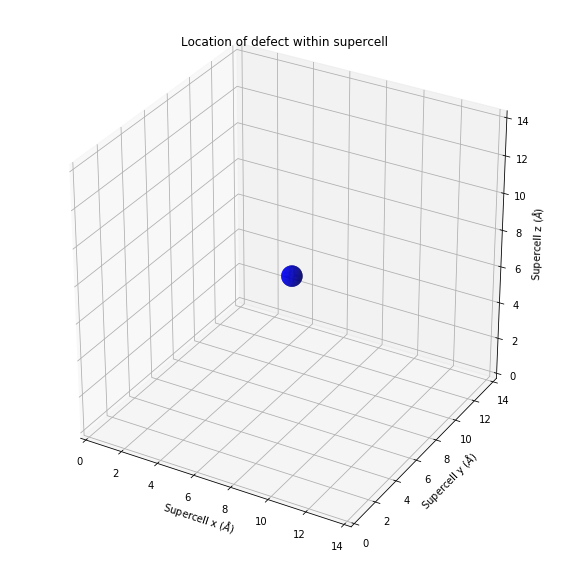

In [6]:
min_x, min_y, min_z = dsa.defect_to_boundary(defect_x, defect_y, defect_z, supercell_dims[0], supercell_dims[1], supercell_dims[2])
logger.info("Nearest defect distances to supercell boundaries (Angstroms): "+str(min_x)+", "+str(min_y)+", "+str(min_z))

figsize(8, 8)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
# Radius of sphere is sigma of Gaussian charge model converted back into Angstroms
x = 0.5 * np.outer(np.cos(u), np.sin(v)) + defect_x
y = 0.5 * np.outer(np.sin(u), np.sin(v)) + defect_y
z = 0.5 * np.outer(np.ones(np.size(u)), np.cos(v)) + defect_z

ax.plot_surface(x, y, z, color='b')
ax.set_xlim3d(0,supercell_dims[0])
ax.set_ylim3d(0,supercell_dims[1])
ax.set_zlim3d(0,supercell_dims[2])
ax.set_xlabel('Supercell x ($\AA$)')
ax.set_ylabel('Supercell y ($\AA$)')
ax.set_zlabel('Supercell z ($\AA$)')
plt.title('Location of defect within supercell')
plt.tight_layout()
plt.savefig(os.path.join(defect_outputs_dir, "defect_location.png"))

plt.show(block=False)

## 9. Lany-Zunger (LZ) finite-size correction scheme


For more information on the LZ scheme, please see doi: 10.1088/0965-0393/17/8/084002. This workflow uses modified functions from [pylada-defects](https://github.com/pylada/pylada-defects). For more information on this implementation of this correction scheme, please see doi: 10.1016/j.commatsci.2016.12.040.

As a reminder, the formation energy of a charged defect is given by:

$ \Delta H_{D,q} = [E_{D,q} + E^{corr}_{q}] - E_{host} + \sum_i n_i (E_i + \mu_i) + q[\epsilon_F + \epsilon_{\nu} + \Delta \nu_{0/b}] $

For this correction scheme, we will first obtain $E^{corr}_{q}$ as the 'image charge correction' in the LZ scheme (but note that this workflow does not include band filling corrections as mentioned already in the assumptions cell in this notebook). After that, we perform potential alignment to obtain the $\nu_{0/b}$ term.

## 9.1 Obtain $E^{corr}_{q}$ from the LZ scheme

The $E^{corr}_q$ term for the defect formation energy is first obtained in this workflow using the LZ correction scheme (see doi: 10.1088/0965-0393/17/8/084002 and doi: 10.1016/j.commatsci.2016.12.040 for more information). Here it is just the 'image-charge correction' that is being computed first and is denoted as $E^{corr}_q$, while sometimes in the literature $E^{corr}_q$ is used to refer to this correction, band filling corrections and the potential alignment that is performed towards the end of this workflow. To avoid confusion with the term calculated next with the FNV scheme, $E^{corr, LZ}_q$ is how this term will be denoted in this workflow. Within the LZ scheme, this correction term is given by:


$ E^{corr, LZ}_q = [ 1 + c_{sh}(1- \frac{1}{\epsilon}) ] \frac{q^2 \alpha_M}{2 \epsilon L} $


Where $L = \Omega^{\frac{-1}{3}}$ is the linear supercell dimension, which has volume $\Omega$, $\epsilon$ is the isotropic average of the calculated static dielectric constant inputed in the 'user inputs' cell, $\alpha_M$ is the Madelung constant and $c_{sh}$ is the shape factor. The latter two terms are related to the supercell geometry. The approximation of isotropic dielectric screening from the host lattice has been made here, this was listed in the assumptions cell earlier in this notebook.


**Note: The cell below may take a while to run.**

# *** Under construction: bug in LZ iic calculation ***

In [7]:
#Need to Check, the LZ image correction should always be positive according to the equation, as far as I known. 
if LZ == True:   
    # Isotropic average of dielectric constant from notebook
    dielectric_av = (dielectric_xx+dielectric_yy+dielectric_zz)/3.0
    # Using modified function from pylada-defects to compute LZ image charge correction
    Madelung_energy, ThirdOrder, csh, scaling_f, E_corr_LZ = pdic.get_imagecharge(lattice_vec_array, charge=defect_charge, epsilon=dielectric_av,cutoff=50.)
    logger.info("LZ image-charge correction, E_corr_LZ = "+str(E_corr_LZ))

[INFO] [Cell line num: 7] LZ image-charge correction, E_corr_LZ = 0.424


## 9.2. Potential alignment to obtain $\Delta \nu_{0/b}$ with the LZ scheme

As a reminder, the formation energy of a charged defect is given by:

$ \Delta H_{D,q} = [E_{D,q} + E^{corr}_{q}] - E_{host} + \sum_i n_i (E_i + \mu_i) + q[\epsilon_F + \epsilon_{\nu} + \Delta \nu_{0/b}] $

In the cell above, $E^{corr}_{q}$ was calculated within the LZ finite-size correction schemes. This part of the workflow obtains the $\Delta \nu_{0/b}$ potential alignment term for the expression above for $\Delta H_{D,q}$ by comparing the electrostatic potentials from electronic structure calculations of a perfect host supercell to that of a charge neutral defect, in a region far from the defect.

Here, this term can be obtained by either using planar averages of the electrostatic potential or averaged atom-site potentials with the sampling region proposed by Kumagai and Oba, depending on settings specified in the user inputs cell.

**Note:** The atom corresponding to the defect is omitted in the following potential alignment plots.

### 9.2.1. Using atom centres and KO sampling region

The script below is used to generate a potential alignment plot between the perfect host supercell and the charge neutral defect supercell using potentials from the electronic structure calculations and the sampling region proposed by Kumagai and Oba for performing the potential alignment step with averaged atom centre potentials. For more information see doi: 10.1103/PhysRevB.89.195205) and Fig. 2(a) in the paper. 

<Figure size 576x576 with 0 Axes>

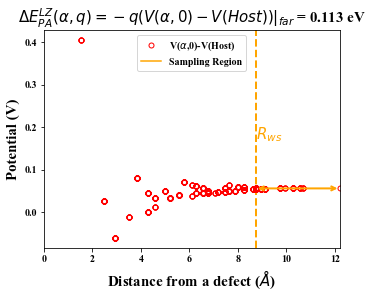

[INFO] [Cell line num: 78] LZ potential alignment correction with atom centres: 0.113
[INFO] [Cell line num: 79] See ProcessedDefects/V_C_diamond/LZ_atom_pa.png for plot of LZ alignment with atom potentials.


In [8]:
if LZ == True and atom_centered_pa == True:
    """
    LZ potential alignment: q(V_0 - V_host)
    #Changing the LZ potential according to the definition shown in the Komsa paper.  
    """
    
    # Defect location is referenced to perfect host supercell for antisite or vacancy
    host_coords_array = dsa.coords_to_array(host_coords_frac)
    # Defect location is referenced to defect supercell for interstitial
    defect_coords_array = dsa.coords_to_array(defect_coords_frac)
    
    # For aligning perfect host supercell potential with charge neutral defect potential
    #defect_atom_pot = neutral_defect_atom_pot
    defect_atom_pot = neutral_defect_atom_pot
    
    # Average free atom potentials read in from header of planar average potential FHI-aims output
    # (Additional shift term necessary for FHI-aims)
    shift_H = apa.read_free_atom_pot(host_planeAv_pot)
    shift_D = apa.read_free_atom_pot(neutral_defect_planeAv_pot)
    
    aims_atom_pots = apa.fhiaims_atomic_pot(defect_type,host_atom_num,defect_atom_num,defect_line,lattice_vec_array,host_coords_array, defect_coords_array, host_atom_pot, defect_atom_pot,shift_H,shift_D)
    aims_atom_pots[:,1] = -1.0*aims_atom_pots[:,1]
    np.savetxt(os.path.join(defect_outputs_dir,'atom_potentials_FHI-aims_LZ.txt'),aims_atom_pots)
    volume = np.dot(lattice_vec_array[0,:],np.cross(lattice_vec_array[1,:],lattice_vec_array[2,:]))  
    
    
    
    #define the parameters corresponding to the Wigner-Seize Cells. 
    Rws = (volume*3.0/(4.0*np.pi))**(1.0/3.0)
    temp_a = (lattice_vec_array[0][0]+lattice_vec_array[1][0]+lattice_vec_array[2][0])**2 
    temp_b = (lattice_vec_array[0][1]+lattice_vec_array[1][1]+lattice_vec_array[2][1])**2 
    temp_c = (lattice_vec_array[0][2]+lattice_vec_array[1][2]+lattice_vec_array[2][2])**2 
    Rwl  = 0.5*np.sqrt(temp_a + temp_b + temp_c)

    
    #Calculate the Potential Alignment Term    
    Dim = len(aims_atom_pots[:,1])
    value = 0 
    number = 0
    for i in range(Dim): 
        dist = aims_atom_pots[i][0] 
        if ((dist > Rws) and (dist < Rwl)): 
            value += aims_atom_pots[i,1]
            number += 1.0
    
    value_sample = value/number 
    value = -1.0*defect_charge*value/number 
 #   value = -1.0*value 
    value = '%.3f' % value 
    pa_atom_LZ = value
 #   print (value)
    title = r'$\Delta E_{PA}^{LZ}(\alpha, q) = -q(V(\alpha,0)-V(Host))|_{far}$ = '+str(value) + ' eV'
    
    mean = (max(aims_atom_pots[:,1]) + min(aims_atom_pots[:,1]))/2.0
    
    
    
    plt.clf()
    matplotlib.rc('font',family='Times New Roman')
    plt.figure(figsize=(5.3,4.0))  
    
    plt.xlim((0,Rwl))
    
    plt.axvline(x=Rws,linestyle='--',color='orange',lw =2.0) 
    plt.text(Rws,mean,r'$R_{ws}$',color='orange',fontsize=15,fontname = "Times New Roman")
    
    plt.title(title,fontsize=15,fontname = "Times New Roman")
    
    plt.plot(aims_atom_pots[:,0],aims_atom_pots[:,1],'o',ms=5,markerfacecolor='none', markeredgecolor='red',label=r'V($\alpha$,0)-V(Host)')
    plt.annotate(s='', xy=(Rwl,value_sample), xytext=(Rws,value_sample), arrowprops=dict(arrowstyle='<->',color = 'orange',lw = 2.0))
    plt.axhline(y=value_sample, xmin=Rws, xmax=Rwl, color='orange',label='Sampling Region')
    plt.legend()
    plt.xlabel(r'Distance from a defect ($\AA$)',fontsize=15,fontname = "Times New Roman")
    plt.ylabel('Potential (V)',fontsize=15,fontname = "Times New Roman")
    plt.savefig(LZ_atom_pa_file,dpi=600)
    plt.show(block=False)
    
    logger.info("LZ potential alignment correction with atom centres: "+str(pa_atom_LZ))
    logger.info("See "+str(LZ_atom_pa_file)+" for plot of LZ alignment with atom potentials.")

### 9.2.2. Using planar averages of calculated potentials
Here the alignment term for the LZ scheme is obtained by aligning planar averages of the potentials from electronic structure calculations of the perfect host supercell and charge neutral defect supercell in a region far from the defect.

**Note: It is usually better to use atom potentials to align the potential if the defect supercell has been relaxed.**

<Figure size 576x576 with 0 Axes>

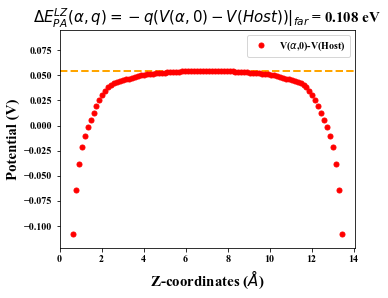

[INFO] [Cell line num: 90] LZ potential alignment correction with planar average: 0.108
[INFO] [Cell line num: 91] See ProcessedDefects/V_C_diamond/LZ_planar_pa.png for plot of LZ alignment with planar average of the potential.


In [9]:
if LZ == True and planar_av_pa == True:
    """
    LZ potential alignment: q(V_q - V_host)
    #same as the discussion in the on-site atom potential alignment term. 
    #According to the Lany Zunger correction, the potential alignment is according to the atoms potential. 
    #We can still do that via plane-average potential, however, the range to determine the potential alignmetn term is unknown.
    """
    # Unit conversion  
    Ha_eV = 27.2116   # hartree to eV
    b_A = 0.529177249  # bohr to angstrom 
    # Set parameters to those calculated in notebook
    charge = defect_charge
    lattice_constant_z = supercell_dims[2]
    Defect_pos = defect_z
    # Locations from FHI-aims output files
    Origin_F = host_planeAv_pot
    Defect_neutral_F = neutral_defect_planeAv_pot
    # Check FHI-aims outputs exist before trying to generate plot
    if not os.path.exists(Origin_F) or not os.path.exists(Defect_neutral_F):
        raise Exception("Required FHI-aims output file not found")

    offset_o, origin = ptt.read_file(Origin_F)
    offset_d, defect_neutral_pot = ptt.read_file(Defect_neutral_F)

    X = defect_neutral_pot[:,0]
    Y = defect_neutral_pot[:,1]*Ha_eV - offset_d - (origin[:,1]*Ha_eV-offset_o) 
    Y = -1.0*Y
    
    
    # find the postion which is most far away from the defect position  and calculate the correction Values. 
    xmin = Defect_pos -0.5*lattice_constant_z 
    xmax = Defect_pos + 0.5*lattice_constant_z 
    if xmin <= 0 and xmax <= lattice_constant_z : 
        corr_pos = xmax 
    else:
        corr_pos = xmin 
    
    idx = (np.abs(X-corr_pos)).argmin()
    value =  -1.0*charge*Y[idx]
    value = '%.3f' % value 
    pa_planAv_LZ = value
    #print (value)
    title = r'$\Delta E_{PA}^{LZ}(\alpha, q) = -q(V(\alpha,0)-V(Host))|_{far}$ = '+str(value) + ' eV'
    
    
    
    #shift the defect position to zero in the potential alignment plot.       
    dim = len(X) 
    X_shift = np.zeros(dim)
    for i in range(dim): 
        X_shift[i] = X[i] - Defect_pos  
        if X_shift[i] <= 0: 
            X_shift[i] += lattice_constant_z 
    
    
    
    
    #begin ploting q*(V(Defect,q) - V(Host))
    plt.clf()
    matplotlib.rc('font',family='Times New Roman')
    plt.figure(figsize=(5.3,4.0)) 
    
    #define the appropriate ylimit 
    ymax = max(Y)
    ymin = min(Y) 
    if abs(ymax) < abs(ymin): 
        ymax = ymax
        ymin = -1.5*ymax
    else: 
        ymax = -1.5*ymin 
        ymin = ymin    
    y_min = ymin - 0.3*(ymax-ymin)
    y_max = ymax + 0.3*(ymax-ymin)
       
    
    plt.title(title,fontsize=15,fontname = "Times New Roman")
    
    plt.xlim((0,lattice_constant_z))
    plt.ylim((y_min,y_max))
    plt.axhline(y=Y[idx], xmin=0, xmax=lattice_constant_z,linestyle = '--', lw=2,color='orange')
    
    plt.plot(X_shift,Y,'or',ms=5,label=r'V($\alpha$,0)-V(Host)')
    plt.legend()
    plt.xlabel(r'Z-coordinates ($\AA$)',fontsize=15,fontname = "Times New Roman")
    plt.ylabel('Potential (V)',fontsize=15,fontname = "Times New Roman")

    plt.savefig(LZ_planar_pa_file,dpi=600)
    plt.show(block=False)
    
    logger.info("LZ potential alignment correction with planar average: "+str(pa_planAv_LZ))
    logger.info("See "+str(LZ_planar_pa_file)+" for plot of LZ alignment with planar average of the potential.")

## 10. The Freysoldt-Neugebauer-Van de Walle (FNV) finite-size correction scheme

For further reading on this finite size correction scheme see doi: 10.1103/PhysRevLett.102.016402. The FNV scheme is implemented here by using the [CoFFEE](https://doi.org/10.1016/j.cpc.2018.01.011) python code. For further information on this specific implementation see doi: 10.1016/j.cpc.2018.01.011. 

As a reminder, the formation energy of a charged defect is given by:

$ \Delta H_{D,q} = [E_{D,q} + E^{corr}_{q}] - E_{host} + \sum_i n_i (E_i + \mu_i) + q[\epsilon_F + \epsilon_{\nu} + \Delta \nu_{0/b}] $

The finite-size electrostatic correction term from the FNV correction scheme is given by:
$ E^{corr}_{q} = E_{q}^{lat} - q\Delta V_{q-0/m} $

$E_{q}^{lat}$ is obtained from a Gaussian charge model and the next term is determined later in this workflow through a 'potential alignment like' procedure which compares the model potential to the difference in potentials for the defect in a charged and neutral states from the electronic structure calculations. This will be discussed more in later cells when this procedure is applied.

#### Charge model for the FNV scheme

This workflow uses the CoFFEE software package when implementing the FNV correction scheme (doi: 10.1103/PhysRevLett.102.016402) for finite-size corrections to charged defect supercells. This correction scheme involves solving the Poisson equation for a charge model system (to infer the electrostatic interactions between the defect and its periodic images) and aligning potentials to derive the correction to the formation energy. The model system used to simulate defect charge interactions with periodic images is a Gaussian within a periodicly repeated supercell where the calculated static dielectric tensor of the host lattice is used to represent the dielectric screening of the defect charge by the host lattice. The schematic below shows a charge model used to simulate the interaction between the defect charge in the central supercell and some of its periodic images. For more details on the charge model used when performing corrections to charged defect supercells with the scheme used in this workflow, please refer to the CoFFEE paper (doi: 10.1016/j.cpc.2018.01.011).

<img src="figures/charge_model_schematic.png" width="200">

#### Determine sigma for the Gaussian charge models for the defect set

The purpose here is to determine the value of sigma for the Gaussian charge model that is small enough to ensure that the charge is contained within the supercell for all supercells in the defect set, including the ones where the defect is closest to the boundary of the supercell. For consistency, the same value of sigma is used for all defects in the set of calculations. As stated in the CoFFEE paper (doi: 10.1016/j.cpc.2018.01.011): 'For bulk systems, it is not necessary that the width of the Gaussian model charge match the defect wavefunction charge density. It suffices if the width is appropriately small to keep the model charge inside the cell.' As already mentioned, band-filling corrections are not currently applied in this workflow. All of these assumptions were listed earlier in the notebook in the assumptions cell.

**This step needs to only be run once for your set of defects, so if it turns out to be slow for a large set of defects just run it once and for subsequent runs replace the cell below with a cell that just contains:**

`sigma = computed_value_from_first_run`

However, tests so far have not shown this to be necessary.

In [10]:
if FNV == True:

    logger.info("The following parameters were calculated for obtaining E_cor_FNV:")
        
    # Determining min distance of any defect to supercell boundary in set of defects
    all_distances_to_boundaries = []
    for geom_file in glob.glob(os.path.join(path_to_all_defects,'**/geometry.in'), recursive=True):
        if not os.path.samefile(geom_file, host_geom):
            defect_coords_tmp = dsa.read_atom_coords(geom_file)
            defect_type_tmp = dsa.find_defect_type(host_coords, defect_coords)
            if (defect_type == 'vacancy'):
                species_vac_tmp, defect_x_tmp, defect_y_tmp, defect_z_tmp, defect_line_tmp = dsa.vacancy_coords(host_coords, defect_coords)
            elif (defect_type == 'interstitial'):
                species_int_tmp, defect_x_tmp, defect_y_tmp, defect_z_tmp, defect_line_tmp = dsa.interstitial_coords(host_coords, defect_coords)
            elif (defect_type == 'antisite'):
                species_in_tmp, species_out_tmp, defect_x_tmp, defect_y_tmp, defect_z_tmp, defect_line_tmp = dsa.antisite_coords(host_coords, defect_coords)
            else:
                logger.info("Error identifying defect type in "+str(geom_file))
            all_distances_to_boundaries.append(min(dsa.defect_to_boundary(defect_x_tmp, defect_y_tmp, defect_z_tmp, supercell_dims[0], supercell_dims[1], supercell_dims[2])))

    closest_defect_to_boundary = abs(min(all_distances_to_boundaries))
    # Define sigma for Gaussian as a 10% less than closest defect distance to boundary in dataset (in Angstroms)
    sigma = closest_defect_to_boundary-(0.1*closest_defect_to_boundary)
    
    # Add in condition to ensure sigma is small enough relative to supercell dimensions to avoid charge spilling over
    if (sigma >= 0.2*min(supercell_dims)):
        sigma = 0.2*min(supercell_dims)
        
    logger.info("Sigma used for Gaussian charge model = "+str(sigma))

[INFO] [Cell line num: 3] The following parameters were calculated for obtaining E_cor_FNV:
[INFO] [Cell line num: 29] Sigma used for Gaussian charge model = 2.8146228623814165


#### Option to manually override sigma value:

In [11]:
if (FNV == True):
    
    # sigma = computed_value_from_first_run
    sigma = 2.614    # from CoFFEE diamond case, for benchmark only  
 
    logger.info("Sigma used for Gaussian charge model overwritten with sigma = "+str(sigma))

[INFO] [Cell line num: 6] Sigma used for Gaussian charge model overwritten with sigma = 2.614


#### Determine cutoff for the Poisson solver based on sigma of Gaussian charge model

The script below sets the cutoff for the plane waves used in CoFFEE's Poisson solver. Smaller sigma values require more plane waves to achieve convergence and the more plane waves the slower the solver will be. 

If it turns out that you are unable to achieve convergence with the cutoff value set based on sigma, there is also the option to override the value and set this manually. This is the 'manual_cutoff' variable in the user inputs cell. Tests so far have not shown this to be necessary.

In [12]:
if FNV == True:

    # Script to compute plane wave cutoff based on sigma (20.0 Hartree was fine for sigma=1.4)
    cutoff_ratio = 20.0/1.4 # Found to converge well in tests
    cutoff = cutoff_ratio/sigma

    # Override computed value if user has set a manual cutoff
    cutoff = manual_cutoff if manual_cutoff else cutoff
    
    logger.info("Cutoff used for Gaussian charge model = "+str(cutoff))

[INFO] [Cell line num: 10] Cutoff used for Gaussian charge model = 20.0


## 10.1. Determine $E_{q}^{lat}$ from the Gaussian charge model

The CoFFEE software package has been developed to be compatible with 1D, 2D and 3D systems. The long range model potential for bulk (3D) systems can be analytically derived, but in the case of spatially varying dielectric profiles (in 1D and 2D systems) it is practical to solve the Poisson equation numerically and extrapolate the electrostatic energy to the isolated limit $E_q^{iso,m}$. Although this workflow is for 3D defect supercells, it follows the general formalism in the CoFFEE workflow that is applicable to 1D, 2D and 3D systems. Therefore, the electrostatic energy is determined for a supercell that is the same size as that used in the electronic structure calculations with FHI-aims (this is denoted by $E_q^{per,m}$) and also for 2x2x2 and 3x3x3 supercells ($E_q^{per,2m}$ and $E_q^{per,3m}$ respectively) of that supercell to allow $E_q^{iso,m}$ to be determined by extrapolating the fit to the energies for the three supercell sizes. $E_q^{lat}$ is then obtained from the equation below.

$E_q^{lat} = E_q^{iso,m} - E_q^{per,m}$

See the [CoFFEE](https://www.sciencedirect.com/science/article/pii/S0010465518300158) paper for more details.


#### Run coffee.py Possion solver for charge models 
This is used to obtain $E_q^{per,m}$ for the charge model that is the same size as the supercell used in the DFT defect calculation and also to calculate $E_q^{per,2m}$ and $E_q^{per,3m}$ for 2x2x2 and 3x3x3 supercells of the DFT supercell.

The values computed for all three supercells will be used to obtain $E_q^{iso,m}$ for the charge model from a fit to the three data points and extrapolating to the limit of an infinite supercell.

**Note: The cell below may take a while to run.**

In [13]:
if FNV == True:

    # Charge model for 3x3x3 supercell of the supercell used in DFT calculations, use to obtain E_q^{per,3m}
    ccf.run_CoFFEE_solver("./coffee.py", defect_outputs_dir, 3, 3, 3, defect_geom, sigma, cutoff, defect_charge, defect_x, defect_y, defect_z, dielectric_xx, dielectric_yy, dielectric_zz)
    # Charge model for 2x2x2 supercell of the supercell used in DFT calculations, use to obtain E_q^{per,3m}
    ccf.run_CoFFEE_solver("./coffee.py", defect_outputs_dir, 2, 2, 2, defect_geom, sigma, cutoff, defect_charge, defect_x, defect_y, defect_z, dielectric_xx, dielectric_yy, dielectric_zz)

    # The 1x1x1 supercell (i.e. same as original defect supercell size) is run last 
    # This is to ensure V_r.npy left in the directory is for this system for subsequent analysis
    # Charge model for same size supercell as used in DFT calculations, use to obtain E_q^{per,m}
    ccf.run_CoFFEE_solver("./coffee.py", defect_outputs_dir, 1, 1, 1, defect_geom, sigma, cutoff, defect_charge, defect_x, defect_y, defect_z, dielectric_xx, dielectric_yy, dielectric_zz)

    for output_name in "V_r.npy", "G1.npy", "G2.npy", "G3.npy", "V_G-model.npy":
        copyfile(output_name, os.path.join(defect_outputs_dir,output_name))

In [14]:
if FNV == True:

    # Do python re equivalent of (grep ! ${charge_model_file}) to get E_q^per,m from output
    E_q_per_m = []
    for dim in range (1,4,1):
        try:
            with open(os.path.join(defect_outputs_dir,"cm_"+str(dim)+"x"+str(dim)+"x"+str(dim)+".out"), 'r') as f:
                for line in f:
                    if re.search('!', line):
                        words = line.split()
                        if  (words[3:6] == ['Sigma', 'too', 'large,']):
                            logger.info('Looks like sigma is too large try setting a smaller value than '+str(sigma)+' in cell above: # sigma = computed_value_from_first_run')
                        if  (words[1:4] == ['Total', 'Energy', '(eV):']):
                            E_q_per_m.append(float(words[4]))
                        if (line == None):
                            logger.info('Warning! - Error finding E_q^{per,m} from '+str(os.path.join(defect_outputs_dir,"cm_"+str(dim)+"x"+str(dim)+"x"+str(dim)+".out")))
                            logger.info('coffee.py may still be calculating E_q^{per,m}, check inside file: '+str(os.path.join(defect_outputs_dir,"cm_"+str(dim)+"x"+str(dim)+"x"+str(dim)+".out")))
                        if (words[1:4] != ['Total', 'Energy', '(eV):']):
                            logger.info('Check '+str(os.path.join(defect_outputs_dir,"cm_"+str(dim)+"x"+str(dim)+"x"+str(dim)+".out"))+' for error messages')
        except IOError:
            logger.info("Could not open "+str(os.path.join(defect_outputs_dir,"cm_"+str(dim)+"x"+str(dim)+"x"+str(dim)+".out")))   
    # E_q_per_m, E_q_per_2m, E_q_per_3m
    if (len(E_q_per_m) == 3):
        logger.info("E_q_per_m = "+str(E_q_per_m[0])+", E_q_per_2m = "+str(E_q_per_m[1])+", E_q_per_3m = "+str(E_q_per_m[2]))
    else:
        logger.info("Error in extracting E_q for charge models.")
    # These values are inputted into the coffee plotting script below to obtain E_iso

[INFO] [Cell line num: 24] E_q_per_m = 1.0744, E_q_per_2m = 1.5407, E_q_per_3m = 1.7049


#### Obtain $E_q^{iso}$ from fit to $E_q^{per,m}$ for defect supercell, 2x2x2  and 3x3x3 of this supercell
Below is a plotting script adapted from plot_fit.py from the CoFFEE_1.1 'Examples' directory. It uses a fit to $E_q^{per,m}$, $E_q^{per,2m}$, $E_q^{per,3m}$ to extrapolate to the infinite supercell limit to get obtain $E_q^{iso,m}$.

$E_q^{iso,m}$ from this fit is used after to compute $E_q^{lat}$.

[INFO] [Cell line num: 22] E_m_iso from extrapolation = 2.039277272727272


<Figure size 576x576 with 0 Axes>

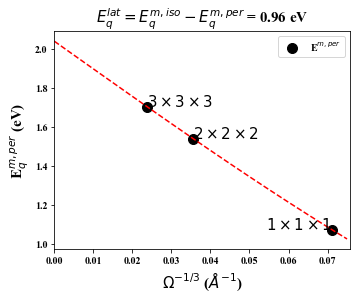

In [15]:
if FNV == True:

    
    # alat is used as scaling parameter for lattice vectors of supercell: (supercell_vol)**(1/3) in Angstrom
    alat = np.prod(supercell_dims)**(1/3.)
    # The Model energies go in here:   # Replace with those calculated in cell above
    E_m = np.array([E_q_per_m[0], E_q_per_m[1], E_q_per_m[2]]) 
    # 1/\Omega^{1/3} for volumes of 1x1x1, 2x2x2, 3x3x3 supercells of original defect supercell
    one_by_V = np.array([1./(1.**3),1/(2.**3),1/(3.**3)])
    one_by_A = (one_by_V)**(1/3.)*(1/alat) # alat used to scale by lattice vectors?
    # Compute the fit: p(\Omega) = f_1 + f_2/(\Omega^(1/3)) + f_3/(\Omega)
    X = ptt.compute_fit([E_m[0], E_m[1], E_m[2]],one_by_A[0],one_by_A[1],one_by_A[2])
    # Use the coefficient obtained above to generate the fitting curve
    x_limit = 0.1*(max(one_by_A)-min(one_by_A))+max(one_by_A)

    Linv = np.arange(0,x_limit,0.005) 
    Y = []
    
    for x in Linv:
        Y.append(X[0]*x + X[1]*x**3 + X[2])
    E_m_iso = X[2]
    logger.info("E_m_iso from extrapolation = "+str(X[2]))
    #print("Fitting parameters (f_1,f_2,f_3):", X[2],X[0],X[1])
    
    value = E_m_iso - E_m[0]
    value = '%.2f' % value 
    title = r'$E_q^{lat} = E_q^{m,iso} - E_q^{m,per}$'+' = '+str(value) + ' eV'

    plt.clf()
    matplotlib.rc('font',family='Times New Roman')
    plt.figure(figsize=(5.3,4.0))  
    plt.xlim((0,x_limit))
    
    
    plt.title(title,fontsize=15,fontname = "Times New Roman")
    
    plt.plot(one_by_A, E_m,'ok',ms=10,label = r'E$^{m,per}$')
    plt.text(one_by_A[0],E_m[0],r'$1\times1\times1$',color='black',ha="right",fontsize=15,fontname = "Times New Roman")
    plt.text(one_by_A[1],E_m[1],r'$2\times2\times2$',color='black',ha="left",fontsize=15,fontname = "Times New Roman")
    plt.text(one_by_A[2],E_m[2],r'$3\times3\times3$',color='black',ha="left",fontsize=15,fontname = "Times New Roman")
    
    
    plt.plot(Linv,Y,'--r') 
    plt.legend()
    plt.xlabel(r'$\Omega^{-1/3}$ ($\AA^{-1}$)',fontsize=15,fontname = "Times New Roman")
    plt.ylabel(r'E$^{m,per}_q$ (eV)',fontsize=15,fontname = "Times New Roman")

    plt.savefig(os.path.join(defect_outputs_dir,"E_iso.png"),dpi=600)
    plt.show(block=False)
    
    


#### Obtain $E_q^{lat}$ term from calculated values

$E_q^{lat} = E_q^{iso,m} - E_q^{per,m}$

In [16]:
if FNV == True:

    # Compute E_q^{lat}
    E_q_lat = E_m_iso - E_q_per_m[0]
    logger.info("E_q_lat (in eV) = E_m_iso - E_q_per_m = "+str(E_q_lat))

    # Save all E_q^{lat} data to defect_outputs_dir/charge_model.dat
    # Write top line as E_q^{iso,m} = ???
    # Next lines: supercell size, E_q^{per,m}
    charge_model_data = open(charge_model_file, "w")
    charge_model_data.write("E_q^{iso,m} = "+str(E_m_iso)+"\n")
    charge_model_data.write("Supercell of defect supercell,  E_q_per_m\n")
    charge_model_data.write("1x1x1, "+str(E_q_per_m[0])+"\n")
    charge_model_data.write("2x2x2, "+str(E_q_per_m[1])+"\n")
    charge_model_data.write("3x3x3, "+str(E_q_per_m[2])+"\n")
    charge_model_data.close()

[INFO] [Cell line num: 5] E_q_lat (in eV) = E_m_iso - E_q_per_m = 0.9648772727272721


## 10.2. Align potentials of charge model and defect supercell to obtain $q\Delta V_{q-0/m}$
As a reminder, the finite-size electrostatic correction term from the FNV correction scheme is given by:
$ E_q^{corr} = E_q^{lat} - q\Delta V_{q-0/m} $

This step is used to calculate $q\Delta V_{q-0/m}$ to obtain the full expression for $E_q^{corr}$ within the FNV finite-size correction scheme (not accounting for any band filling effects for shallow defects). A 'potential alignment like' procedure is used to obtain $q\Delta V_{q-0/m}$ where the potential of the charge model is compared to the difference in potentials for the defect in a charged and neutral states from the electronic structure calculations.

As a reminder, the formation energy of a charged defect is given by:

$ \Delta H_{D,q} = [E_{D,q} + E^{corr}_{q}] - E_{host} + \sum_i n_i (E_i + \mu_i) + q[\epsilon_F + \epsilon_{\nu} + \Delta \nu_{0/b}] $

When implementing the FNV scheme, it is possible to obtain $E^{corr}_{q}$ and $\Delta \nu_{0/b}$ at the same time by also aligning the potentials of the perfect host supercell to the charge neutral defect in the region far from the defect. All terms will be generated in the plots below.

**Note:** The atom corresponding to the defect is omitted in the following potential alignment plots.

### 10.2.1. Using atom centres and KO sampling region

The script below is used to generate the sampling region proposed by Kumagai and Oba for performing the potential alignment step with averaged atom centre potentials. For more information see doi: 10.1103/PhysRevB.89.195205) and Fig. 2(a) in the paper. 

#### First calculate atom centre potentials from the CoFFEE charge model:

In [17]:
if FNV == True and atom_centered_pa == True:
    
    # Generate file for average atom centred potentials for CoFFEE charge model:
    # (Adapted from bottom of Tong's original APA_script/main.py)

    hartree = 27.2116
    
    # Defect location is referenced to perfect host supercell for antisite or vacancy
    host_coords_array = dsa.coords_to_array(host_coords_frac)
    # Defect location is referenced to defect supercell for interstitial
    defect_coords_array = dsa.coords_to_array(defect_coords_frac)
    
    grid_t, model = ptt.py_read('V_G-model.npy')
    grid_g1, G1 = ptt.py_read('G1.npy')
    grid_g2, G2 = ptt.py_read('G2.npy')
    grid_g3, G3 = ptt.py_read('G3.npy')
    grid = np.array(grid_t)
    grid.astype(int)
    model = model*hartree
    model_atom_pots = apa.model_atomic_pot(defect_type,host_atom_num,defect_line,grid,lattice_vec_array,host_coords_array,defect_coords_array,model,sigma,G1,G2,G3)
    model_atom_pots[:,1] = -1.0*model_atom_pots[:,1] 
    np.savetxt(os.path.join(defect_outputs_dir,'atom_potentials_FNV_model.txt'),model_atom_pots)

#### Generate plot to align atom centre potentials of charge model and defect supercells:

[INFO] [Cell line num: 74] FNV potential alignment correction with atom centres: 0.091
[INFO] [Cell line num: 75] See ProcessedDefects/V_C_diamond/FNV_atom_pa.png for plot of FNV alignment with atom potentials.


<Figure size 576x576 with 0 Axes>

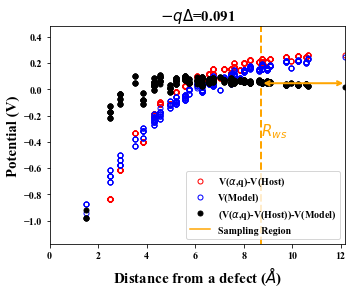

In [18]:
if FNV == True and atom_centered_pa == True:
    """
    Full alignment (for E_corr and pa): q(V_0 - V_host) and q((V_charge-V_0) - V_model)
    """
    
    # For aligning potential of charge model to charged defect supercell potential
    defect_atom_pot = charged_defect_atom_pot

    # Average free atom potentials read in from header of planar average potential FHI-aims output
    # (Additional shift term necessary for FHI-aims)
    shift_H = apa.read_free_atom_pot(host_planeAv_pot)
    shift_D = apa.read_free_atom_pot(neutral_defect_planeAv_pot)
    
    aims_atom_pots = apa.fhiaims_atomic_pot(defect_type,host_atom_num,defect_atom_num,defect_line,lattice_vec_array,host_coords_array, defect_coords_array, host_atom_pot, defect_atom_pot,shift_H,shift_D)
    aims_atom_pots[:,1] = -1.0*aims_atom_pots[:,1]
    np.savetxt(os.path.join(defect_outputs_dir,'atom_potentials_FHI-aims_FNV.txt'),aims_atom_pots)
    volume = np.dot(lattice_vec_array[0,:],np.cross(lattice_vec_array[1,:],lattice_vec_array[2,:]))  
    
    Rws = (volume*3.0/(4.0*np.pi))**(1.0/3.0)
    temp_a = (lattice_vec_array[0][0]+lattice_vec_array[1][0]+lattice_vec_array[2][0])**2 
    temp_b = (lattice_vec_array[0][1]+lattice_vec_array[1][1]+lattice_vec_array[2][1])**2 
    temp_c = (lattice_vec_array[0][2]+lattice_vec_array[1][2]+lattice_vec_array[2][2])**2 
    Rwl  = 0.5*np.sqrt(temp_a + temp_b + temp_c)
    Model = np.loadtxt(os.path.join(defect_outputs_dir,'atom_potentials_FNV_model.txt'))
    Model[:,1] = -1.0*Model[:,1]
    Diff = aims_atom_pots[:,1] - Model[:,1] 
    Dim = len(Diff)
    number = 0
    value = 0
 
    for i in range(Dim):
        #print(Model[i,0])
        if ((Model[i,0] > Rws) and (Model[i,0] < Rwl)):
            value += Diff[i]
            number += 1.0 

    value_sample = value/number 
    value = defect_charge*value/number 
    value = -1.0*value 
    value = '%.3f' % value
    pa_atom_FNV = value
    title = r'$-q \Delta $'+'='+str(value) 
    y_min = min(Model[:,1])
    y_max = max(Model[:,1])
    Ymin = y_min - 0.2*(y_max-y_min)
    Ymax = y_max + 0.2*(y_max-y_min)    
    mean = (Ymin+Ymax)/2.0
    
    plt.clf()
    matplotlib.rc('font',family='Times New Roman')
    plt.figure(figsize=(5.3,4.0))  
    
    plt.xlim((0,Rwl))
    plt.ylim((Ymin,Ymax))
    
    plt.axvline(x=Rws,linestyle='--',color='orange',lw =2.0) 
    plt.text(Rws,mean,r'$R_{ws}$',color='orange',fontsize=15,fontname = "Times New Roman")
    
    plt.title(title,fontsize=15,fontname = "Times New Roman")
    
    #plt.plot(X1,Y1,'or',label='V(Defect,q)-V(Defect,0)')
    plt.plot(aims_atom_pots[:,0],aims_atom_pots[:,1],'o',ms=5,markerfacecolor='none', markeredgecolor='red',label=r'V($\alpha$,q)-V(Host)')
    plt.plot(Model[:,0],Model[:,1],'o',ms=5,markerfacecolor='none', markeredgecolor='blue',label=r'V(Model)')
    plt.plot(Model[:,0],Diff,'ok',ms=5,label=r'(V($\alpha$,q)-V(Host))-V(Model)')
    plt.annotate(s='', xy=(Rws,value_sample), xytext=(Rwl,value_sample), arrowprops=dict(arrowstyle='<->',color = 'orange',lw = 2.0))
    plt.axhline(y=value_sample, xmin=Rws, xmax=Rwl, color='orange',label='Sampling Region')
    
    
    plt.legend()
    plt.xlabel(r'Distance from a defect ($\AA$)',fontsize=15,fontname = "Times New Roman")
    plt.ylabel('Potential (V)',fontsize=15,fontname = "Times New Roman")
    plt.savefig(FNV_atom_pa_file,dpi=600)
    
    logger.info("FNV potential alignment correction with atom centres: "+str(pa_atom_FNV))
    logger.info("See "+str(FNV_atom_pa_file)+" for plot of FNV alignment with atom potentials.")

### 10.2.1. Using planar average of electrostatic potential

This is the default method for performing the potential aligment step in the CoFFEE implementation of the FNV scheme.

**Note: It is usually better to use atom potentials to align the potential if the defect supercell has been relaxed.**

#### Obtain planar average of the potential of the charge model:
This is needed to align potentials between the charge model and the defect supercells when using planar averages for the alignment method. This is used with planar averaged potentials along the z-direction (referred to as 'a3' in CoFFEE) from FHI-aims calculations for the perfect host, charged defect and neutral defect supercells.

First we write an 'in_V' file for the supercell to use with the utility script from CoFFEE_1.1/PotentialAlignment/Utilities/plavg.py

In [19]:
if FNV == True and planar_av_pa == True:

    # Write in_V file for CoFFEE, convert supercell dims from Angstrom to Bohr
    ccf.write_CoFFEE_in_V_file(supercell_dims[2]*1.88972598858)

The script below uses V_r.npy generated from the coffee.py Poisson solver for the charge model with the same supercell size as the DFT calculations with the in_V file written in cell above to obtain planar average of potential for the charge model along the z-direction.

This produces to following file: plavg_a3.plot, which is in units of Bohr.

In [20]:
if FNV == True and planar_av_pa == True:

    # Script adapted from plavg.py written by Mit Naik (March 2017) found in the CoFFEE_1.1 package at 
    # 'PotentialAlignment/Utilities/plavg.py', parts of the original script not used in this workflow have been omitted below
    # And functions from the script have been included in 'Plotting.py'.

    # This is used to obtain the planar average of the potential of the charge model along the z-direction:
    # plavg_a3.plot

    #-----------------
    #  plavg.py
    #  Computes planar average of 3D data
    #  written by Mit Naik (March 2017)
    #-----------------
    
    bohr = 0.52917721092
    rydberg = 13.60569253
    hartree = 27.21138505
    inf9 = 1.0e+9

    # Parameters from in_V and checking all are valid
    file_inp,file_type,direction,factor,cell_dim = ptt.read_input("in_V")
    if direction != "a1" and direction != "a2" and direction != "a3":
        print("Please specify plt_dir in the input file. It takes a1/a2/a3")
        sys.exit()
    if file_type != "cube" and file_type != "xsf" and file_type != "python":
        print("Please specify file_type in the input file. It takes cube/xsf/python")
    if file_type == "cube":
        ierr, na, aspecies, acharge, aposition, grid, origin, step, vol = cub_read(file_inp)
    elif file_type == "xsf":
        na, primcoord, grid, origin, step, vol = xsf_read(file_inp)
    elif file_type == "python":
        grid,vol = ptt.py_read(file_inp)

    vol = np.array(vol)
    #print("Shape of the data in the file:", np.shape(vol))
    if direction == "a3":
        if file_type == "python":
            step_l = cell_dim/grid[2]
        else:
            step_l = np.sqrt(np.dot(step[2],step[2]))
        vol_a3, A3 = ptt.pl_avg_a3(vol,grid[0],grid[1],grid[2], step_l,factor, hartree, rydberg)
        ptt.write2file("plavg_a3.plot",A3,vol_a3)

/Users/suzannewallace/PhD/git_repos/DefectCorrectionsNotebook/PlottingFunctions.py:101: ComplexWarning: Casting complex values to real discards the imaginary part
  vol_a3[k] = Sum1/(a2_dim*a1_dim)


#### Generate plot to align planar average of potentials of charge model and defect supercells:

The final plotting script below uses plavg_a3.plot for the planar average of the charge model from CoFFEE with 'plane_average_realspace_ESP.out' files from FHI-aims calculations for the perfect host, neutral defect and charged defect supercells.

TZ: Potential Alignment from planer avearge of potentials  
   
    CoFFEE format: divided into two plots: 
                q((V_Charge-V_0) - V_model) (FNV_planar_pa_C2.png)     q(V_0-V_host) (FNV_planar_pa_C1.png)
       
    In the Original Freysoldt Correction PRL paper: 
            Just   q((V_charge-V_host) - V_model)  (FNV_planar_pa_Frey.png)
    

TZ: Several Enhancement. We can either contact Mit Naik or change that by ourself. 
    1. The plane average electrostatic potential of the model from CoFFEE seems not correct, the center are not exact in the defect position, a little shift.   
    2. The grids of plane average electrostatic potential of the model from the CoFFEE are not the same as that in the FHI-aims. 
        It's easy to let the user input the grids they want to produce the electrostatic potential, so that it can produce the Model potential at the exact same grids as that in the FHI-aims. Based on these Model potential, we can plot the Difference easily (V(Defect) -V(Host)) - V(Model). Otherwise, it's not easy to  plot this Diff. directly in the plot.   

<Figure size 576x576 with 0 Axes>

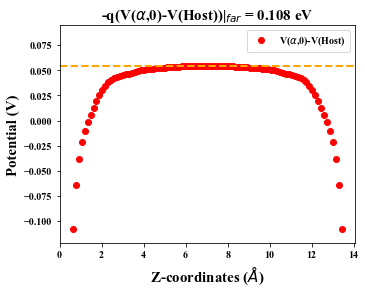

<Figure size 576x576 with 0 Axes>

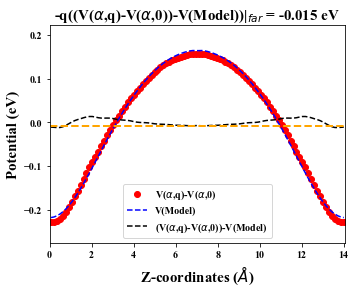

<Figure size 576x576 with 0 Axes>

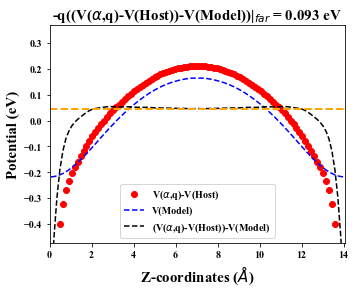

[INFO] [Cell line num: 222] FNV potential alignment correction with planar average: 0.093
[INFO] [Cell line num: 223] See ProcessedDefects/V_C_diamond/FNV_planar_pa.png for plot of FNV alignment with planar average of the potential.


In [21]:
if FNV == True and planar_av_pa == True:
    """
    Full alignment (for E_corr and pa): q(V_0 - V_host) and q((V_charge-V_0) - V_model)
    """
    #unit conversion  
    Ha_eV = 27.2116   # hartree to eV
    b_A = 0.529177249  # bohr to angstrom 
    # Set parameters to those calculated in notebook
    charge = defect_charge
    lattice_constant_z = supercell_dims[2]
    Defect_pos = defect_z
    # Locations from FHI-aims output files
    Origin_F = host_planeAv_pot
    Defect_neutral_F = neutral_defect_planeAv_pot
    Defect_charge_F = charged_defect_planeAv_pot
    Defect_model_F = "plavg_a3.plot"
    # Check FHI-aims outputs exist before trying to generate plot
    if not os.path.exists(Origin_F) or not os.path.exists(Defect_neutral_F) or not os.path.exists(Defect_charge_F):
        raise Exception("Required FHI-aims output file not found")

    offset_o, origin = ptt.read_file(Origin_F)
    offset_d, defect_neutral_pot = ptt.read_file(Defect_neutral_F)

    X = defect_neutral_pot[:,0]
    Y = defect_neutral_pot[:,1]*Ha_eV - offset_d - (origin[:,1]*Ha_eV-offset_o) 
    Y = -1.0*Y
    
    # find the postion which is most far away from the defect position  and calculate the correction Values. 
    xmin = Defect_pos -0.5*lattice_constant_z 
    xmax = Defect_pos + 0.5*lattice_constant_z 
    if xmin <= 0 and xmax <= lattice_constant_z : 
        corr_pos = xmax 
    else:
        corr_pos = xmin 
    
    idx_far = (np.abs(X-corr_pos)).argmin()
    value =  -1.0*charge*Y[idx_far]
    value = '%.3f' % value 
#    print (value)
    title = r'-q(V($\alpha$,0)-V(Host))|$_{far}$'+' = '+str(value) + ' eV'
    
    #shift the defect position to the 0 in the potential alignment plot , 
    dim = len(X) 
    X_shift = np.zeros(dim)
    for i in range(dim): 
        X_shift[i] = X[i] - Defect_pos  
        if X_shift[i] <= 0: 
            X_shift[i] += lattice_constant_z 
    
    
    #begin generating plots as shown in the CoFFEE code (two figures for the potential alignment term)
    #begin ploting q*(V(Defect,0) - V(Host))
    
    #define the appropriate ylimit for the plot 
    ymax = max(Y)
    ymin = min(Y) 
    if abs(ymax) < abs(ymin): 
        ymax = ymax
        ymin = -1.5*ymax
    else: 
        ymax = -1.5*ymin 
        ymin = ymin    
    y_min = ymin - 0.3*(ymax-ymin)
    y_max = ymax + 0.3*(ymax-ymin)
    
    plt.clf()
    matplotlib.rc('font',family='Times New Roman')
    plt.figure(figsize=(5.3,4.0))  
    
    plt.xlim((0,lattice_constant_z))
    plt.ylim((y_min,y_max))
    
    plt.title(title,fontsize=15,fontname = "Times New Roman")
    
    
    plt.plot(X_shift,Y,'or',label=r'V($\alpha$,0)-V(Host)')
    plt.axhline(y=Y[idx_far], xmin=0, xmax=lattice_constant_z,linestyle = '--',lw=2, color='orange')
    plt.legend()
    plt.xlabel(r'Z-coordinates ($\AA$)',fontsize=15,fontname = "Times New Roman")
    plt.ylabel('Potential (V)',fontsize=15,fontname = "Times New Roman")
    plt.savefig(os.path.join(defect_outputs_dir,"FNV_planar_pa_C1.png"),dpi=600)
    plt.show(block=False)
    
    
    #begin plot    V(Defect,charge) - V(Defect,0) and   V_Model 
    plt.clf()
    matplotlib.rc('font',family='Times New Roman')
    plt.figure(figsize=(5.3,4.0)) 
    
    offset_d2, defect_charge_pot = ptt.read_file(Defect_charge_F)
    Model = np.loadtxt(Defect_model_F)
    X1 = defect_charge_pot[:,0]
    Y1 = defect_charge_pot[:,1]*Ha_eV-offset_d2 - (defect_neutral_pot[:,1]*Ha_eV-offset_d)
    Y1 = -1.0*Y1
    X_model = Model[:,0]*b_A
    Y_model = Model[:,1]  
  
    #define the appropriate y limit for the plot 
    Y_min = min(Y_model)
    Y_max = max(Y_model)
    Ymin = Y_min - 0.15*(Y_max-Y_min)
    Ymax = Y_max + 0.15*(Y_max-Y_min)
    
    #Move the model so that it actually at the defect positions. (fix the bug in the CoFFEE(numerical errors))   
    modelmax = max(abs(Y_model)) 
    dim_model = len(X_model)
    for i in range(dim_model): 
        if abs(Y_model[i]) == modelmax: 
            model_x_defect = X_model[i] 
    shift = model_x_defect - Defect_pos 
    X_model_temp = X_model - shift 
    for i in range(dim_model): 
        if X_model_temp[i] < 0: 
            X_model_temp[i] += lattice_constant_z 
        elif X_model_temp[i] > lattice_constant_z: 
            X_model_temp[i] -= lattice_constant_z 
    
    #sort the X and Y model so that it have the right sequence. 
    sorter = X_model_temp.argsort()
    Y_model_temp = Y_model[sorter]
    X_model_temp = np.sort(X_model_temp)  

    
    #generate a model potential at the exact same grid as that in FHI-aims output. (By polinomial fit, 12 dimension)  
    param = np.polyfit(X_model_temp, Y_model_temp, 12)
    poly = np.poly1d(param)
    dim = len(X1)
    Y_model_corr = np.zeros(dim)
    for i in range(dim):
        Y_model_corr[i] = poly(X1[i])

    #Find the correction values 
    Diff = Y1 - Y_model_corr
    value_sample = Diff[idx_far]
    value =  -1.0*charge*Diff[idx_far]
    value = '%.3f' % value 
 #   print (value)
    title = r'-q((V($\alpha$,q)-V($\alpha$,0))-V(Model))|$_{far}$'+' = '+str(value) + ' eV'
    
    
    #Move the defect position to 0
    dim = len(X1) 
    X1_shift = np.zeros(dim)
    for i in range(dim): 
        X1_shift[i] = X1[i] - Defect_pos  
        if X1_shift[i] <= 0: 
            X1_shift[i] += lattice_constant_z 
    
    #sorted all arrays 
    sorter_save = X1_shift.argsort()
    Y1 = Y1[sorter_save]
    Y_model_corr = Y_model_corr[sorter_save]
    Diff = Diff[sorter_save]
    X1_shift = np.sort(X1_shift)
        
    plt.title(title,fontsize=15,fontname = "Times New Roman")
    
    plt.xlim((0,lattice_constant_z))
    plt.ylim((Ymin,Ymax))
    
    plt.plot(X1_shift,Y1,'or',label=r'V($\alpha$,q)-V($\alpha$,0)')
    plt.plot(X1_shift,Y_model_corr,'--b',label='V(Model)')
    plt.plot(X1_shift,Diff,'--k',label = r'(V($\alpha$,q)-V($\alpha$,0))-V(Model)')
    plt.axhline(y=value_sample, xmin=0, xmax=lattice_constant_z,linestyle = '--',lw=2, color='orange')
    plt.legend()
    plt.xlabel(r'Z-coordinates ($\AA$)',fontsize=15,fontname = "Times New Roman")
    plt.ylabel('Potential (eV)',fontsize=15,fontname = "Times New Roman")
    plt.savefig(os.path.join(defect_outputs_dir,"FNV_planar_pa_C2.png"),dpi=600)
    plt.show(block=False)
    
    
    #begin generating plots like shown in the original Freysoldt correction paper (One plot for the whole potential alignment)
    #begin plot    V(Defect,charge) - V(Host) and   V_Model
    plt.clf()
    matplotlib.rc('font',family='Times New Roman')
    plt.figure(figsize=(5.3,4.0)) 
    
    offset_d2, defect_charge_pot = ptt.read_file(Defect_charge_F)
    Model = np.loadtxt(Defect_model_F)
    X2 = defect_charge_pot[:,0]
    Y2 = defect_charge_pot[:,1]*Ha_eV-offset_d2 - (origin[:,1]*Ha_eV-offset_o)
    Y2 = -1.0*Y2
    
    Y2 = Y2[sorter_save]
    Diff2 = Y2 - Y_model_corr 
    
    
    idx_far = (np.abs(X1_shift-0.5*lattice_constant_z)).argmin()
    value =  -1.0*charge*Diff2[idx_far]
    value = '%.3f' % value
    pa_planAv_FNV = value
 #   print (value)
    title = r'-q((V($\alpha$,q)-V(Host))-V(Model))|$_{far}$'+' = '+str(value) + ' eV'
    
    
    ymax = max(Y2)
    ymin = min(Y2) 
    if abs(ymax) < abs(ymin): 
        ymax = ymax
        ymin = -1.5*ymax
    else: 
        ymax = -1.5*ymin 
        ymin = ymin    
    y_min = ymin - 0.3*(ymax-ymin)
    y_max = ymax + 0.3*(ymax-ymin)

    plt.title(title,fontsize=15,fontname = "Times New Roman")
    
    plt.xlim((0,lattice_constant_z))
    plt.ylim((y_min,y_max))
    
    plt.plot(X1_shift,Y2,'or',label=r'V($\alpha$,q)-V(Host)')
    plt.plot(X1_shift,Y_model_corr,'--b',label='V(Model)')
    plt.plot(X1_shift,Diff2,'--k',label=r'(V($\alpha$,q)-V(Host))-V(Model)')
    plt.axhline(y=Diff2[idx_far], xmin=0, xmax=lattice_constant_z,linestyle = '--', lw =2, color='orange')
    plt.legend()
    plt.xlabel(r'Z-coordinates ($\AA$)',fontsize=15,fontname = "Times New Roman")
    plt.ylabel('Potential (eV)',fontsize=15,fontname = "Times New Roman")
    plt.savefig(os.path.join(defect_outputs_dir,"FNV_planar_pa_Frey.png"),dpi=600)
    plt.show(block=False)
    
    logger.info("FNV potential alignment correction with planar average: "+str(pa_planAv_FNV))
    logger.info("See "+str(FNV_planar_pa_file)+" for plot of FNV alignment with planar average of the potential.")

## 11. Write file containing computed values for corrections

In [22]:
final_outputs = open(final_outputs_file, "w")

if (LZ == False):
    final_outputs.write("You did not request the LZ scheme.\n")
else:
    final_outputs.write("Here are the outputs from the Lany-Zunger (LZ) finite-size correction scheme:\n")
    final_outputs.write("LZ image-charge correction, E_corr_LZ = "+str(E_corr_LZ)+"\n")
    if (LZ == True) and (atom_centered_pa == True):
        final_outputs.write("LZ potential alignment correction with atom centres: "+str(pa_atom_LZ)+"\n")
        final_outputs.write("Please check "+str(LZ_atom_pa_file)+" to ensure that the sampling region far from the defect has a converged potential.\n")
    if (LZ == True) and (planar_av_pa == True):
        final_outputs.write("LZ potential alignment correction with planar average: "+str(pa_planAv_LZ)+"\n")
        final_outputs.write("Please check "+str(LZ_planar_pa_file)+" to ensure that the sampling region far from the defect has a converged potential.\n")
    final_outputs.write("\n")
    
if (FNV == False):
    final_outputs.write("You did not request the FNV scheme.\n")
else:
    final_outputs.write("Here are the outputs from the Freysoldt-Neugebauer-Van de Walle (FNV) finite-size correction scheme:\n")
    final_outputs.write("E_q_lat (in eV) = E_m_iso - E_q_per_m = "+str(E_q_lat)+"\n")
    if (FNV == True) and (atom_centered_pa == True):
        final_outputs.write("FNV potential alignment correction with atom centres: "+str(pa_atom_FNV)+"\n")
        final_outputs.write("Please check "+str(FNV_atom_pa_file)+" to ensure that the sampling region far from the defect has a converged potential.\n")
    if (FNV == True) and (planar_av_pa == True):
        final_outputs.write("FNV potential alignment correction with planar average: "+str(pa_planAv_FNV)+"\n")
        final_outputs.write("Please check "+str(FNV_planar_pa_file)+" to ensure that the sampling region far from the defect has a converged potential.\n")
    
final_outputs.close()

## 12. Cleanup unnecessary outputs
The cell below removes unnecessary output files. See 'log.info' for an overview of the outputs from this notebook and 'corrections_summary.dat' for the final correction terms that have been computed. Have a nice day!

In [23]:
''' CURRENTLY KEEPING ALL FILES DURING TEST PHASE

# Clean up defect_outputs dir
for cm_output in glob.glob(os.path.join(defect_outputs_dir,"cm_*")):
    os.remove(cm_output)
for coffee_outputs in glob.glob(os.path.join(defect_outputs_dir,"*.npy")):
    os.remove(coffee_outputs)

# Clean up main dir
os.remove("plavg_a3.plot")
os.remove("in_V")
for coffee_outputs in glob.glob("*.npy"):
    os.remove(coffee_outputs)
'''

' CURRENTLY KEEPING ALL FILES DURING TEST PHASE\n\n# Clean up defect_outputs dir\nfor cm_output in glob.glob(os.path.join(defect_outputs_dir,"cm_*")):\n    os.remove(cm_output)\nfor coffee_outputs in glob.glob(os.path.join(defect_outputs_dir,"*.npy")):\n    os.remove(coffee_outputs)\n\n# Clean up main dir\nos.remove("plavg_a3.plot")\nos.remove("in_V")\nfor coffee_outputs in glob.glob("*.npy"):\n    os.remove(coffee_outputs)\n'